In [10]:
import pandas as pd
import numpy as np

# assume around 2.5 mm of melting/°C per day -> 0.1mm/h/°C roughly

# start with a very simple model of snow the snow cover (only temperature and snow fall)

snowfall is in cm for the historic dataset

In [2]:
histWeather = pd.read_csv("../data/forecast_weather.csv")

In [36]:
histWeather['temperature'].min()

-27.499395751953102

In [40]:
histWeather['meltingInCM'] = -0.001 * histWeather['temperature'].clip(lower=1)
histWeather['snowHeightFlux'] = histWeather['snowfall'] + histWeather['meltingInCM']

test = histWeather.loc[(histWeather.latitude == 57.6) & (histWeather.longitude==21.7)]

In [45]:
snowcover = 0
snowcoverArr = np.zeros((test.shape[0]))
for i,snowFlux in enumerate(test['snowHeightFlux']):
    snowcover = max(snowcover + snowFlux,0)
    print(snowcover,snowFlux,test['temperature'].iloc[i])
    snowcoverArr[i] = snowcover
test['snowcover'] = snowcoverArr

0 -0.015655786132812526 15.655786132812525
0 -0.015779687500000025 15.779687500000025
0 -0.015813745117187524 15.813745117187525
0 -0.015852929687500024 15.852929687500025
0 -0.015797753906250024 15.797753906250025
0 -0.015498803710937524 15.498803710937525
0 -0.015274377441406273 15.274377441406273
0 -0.015152551269531273 15.152551269531273
0 -0.015073815917968773 15.073815917968773
0 -0.014928918457031273 14.928918457031273
0 -0.014696801757812525 14.696801757812525
0 -0.014761376953125025 14.761376953125025
0 -0.014726647949218774 14.726647949218773
0 -0.014753320312500024 14.753320312500025
0 -0.014935144042968774 14.935144042968773
0 -0.014993066406250024 14.993066406250025
0 -0.015162377929687524 15.162377929687525
0 -0.014671044921875025 14.671044921875025
0 -0.014220971679687526 14.220971679687525
0 -0.014140039062500024 14.140039062500025
0 -0.014417260742187524 14.417260742187525
0 -0.013957666015625024 13.957666015625025
0 -0.013620141601562524 13.620141601562525
0 -0.013850

/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_30035/3289670907.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['snowcover'] = snowcoverArr


<Axes: >

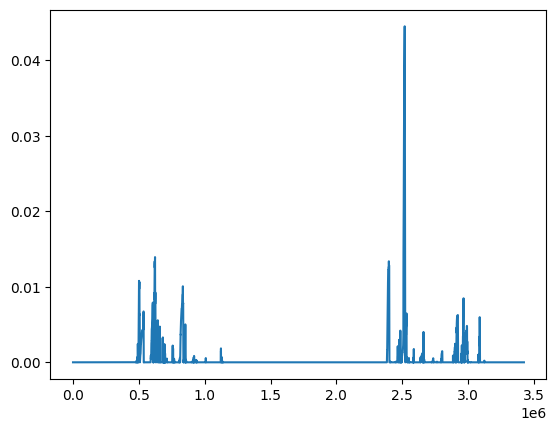

In [42]:
test.snowcover.plot()